In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn import linear_model

In [399]:
df=pd.read_csv("canada_per_capita_income.csv")

In [400]:
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [401]:
df.dtypes

year                         int64
per capita income (US$)    float64
dtype: object

In [402]:
df.sum().isnull()

year                       False
per capita income (US$)    False
dtype: bool

In [403]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [404]:
df.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


In [405]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [406]:
df.rename(columns={'per capita income (US$)': 'per_capita_income'}, inplace=True)


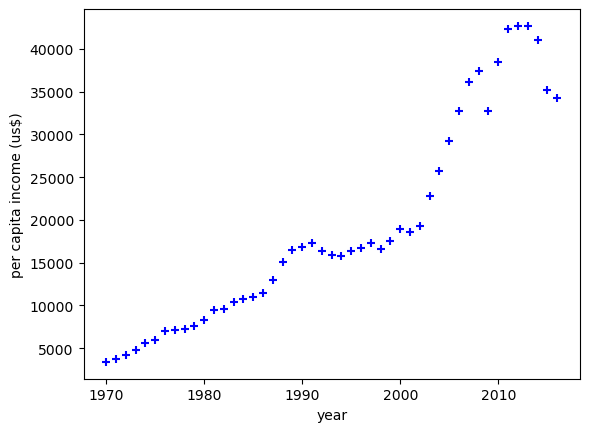

In [407]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (us$)')
plt.scatter(df.year,df.per_capita_income,color='blue',marker='+')

In [467]:
reg=linear_model.LinearRegression()
reg.fit(df[['year']],df.per_capita_income)

reg.predict([[2020]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [409]:
reg.coef_

array([828.46507522])

In [410]:
reg.intercept_

-1632210.7578554575

In [411]:
828.46507522*2020-1632210.7578554575

41288.694088942604

In [412]:
d=pd.read_csv("percappredition.csv")

In [413]:
d


,year
0,2004
1,2005
2,2009
3,2007
4,2022
5,2011
6,2033
7,2050
8,2044
9,2015


In [414]:
x=reg.predict(d)

In [437]:
d["predict_percap"]=x

In [439]:
d

,year,predict_percap
0,2004,28033.252891
1,2005,28861.717966
2,2009,32175.578267
3,2007,30518.648117
4,2022,42945.624245
5,2011,33832.508417
6,2033,52058.740072
7,2050,66142.646351
8,2044,61171.855900
9,2015,37146.368718


In [447]:
d.to_csv("percappredition.csv",index=False)

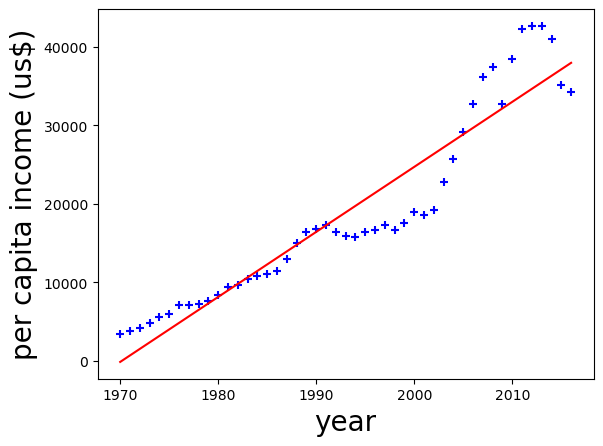

In [463]:
%matplotlib inline
plt.xlabel('year',fontsize=20)
plt.ylabel('per capita income (us$)',fontsize=20)
plt.scatter(df.year,df.per_capita_income,color='blue',marker='+')
plt.plot(df.year,reg.predict(df[['year']]),color='red')